### Import data

In [52]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

MORTALITY_RATE = pd.read_csv("mortality_rate.csv", delimiter=";")

In [53]:
MORTALITY_RATE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           164 non-null    int64  
 1   CCI0          164 non-null    float64
 2   SxFict_FCCI0  164 non-null    float64
 3   EV_CCI0       164 non-null    float64
 4   CCI1          164 non-null    float64
 5   SxFict_FCCI1  164 non-null    float64
 6   EV_CCI1       164 non-null    float64
 7   CCI2          164 non-null    float64
 8   SxFict_FCCI2  164 non-null    float64
 9   EV_CCI2       164 non-null    float64
 10  CCI3          164 non-null    float64
 11  SxFict_FCCI3  164 non-null    float64
 12  EV_CCI3       164 non-null    float64
 13  Gender        164 non-null    object 
dtypes: float64(12), int64(1), object(1)
memory usage: 18.1+ KB


### Cleaning data

In [54]:
ev_columns = ['EV_CCI0', 'EV_CCI1', 'EV_CCI2', 'EV_CCI3']
MORTALITY_RATE_LONG = MORTALITY_RATE.melt(id_vars=['Age', 'Gender'], value_vars=ev_columns,
                  var_name='CCI_Level', value_name='Life_Expectancy')

MORTALITY_RATE_LONG['CCI_Level'] = MORTALITY_RATE_LONG['CCI_Level'].map({
    'EV_CCI0': 'CCI 0 (No comorbidity)',
    'EV_CCI1': 'CCI 1 (Low)',
    'EV_CCI2': 'CCI 2 (Medium)',
    'EV_CCI3': 'CCI 3 (High)'
})

### Comparison of male and female mortality rates

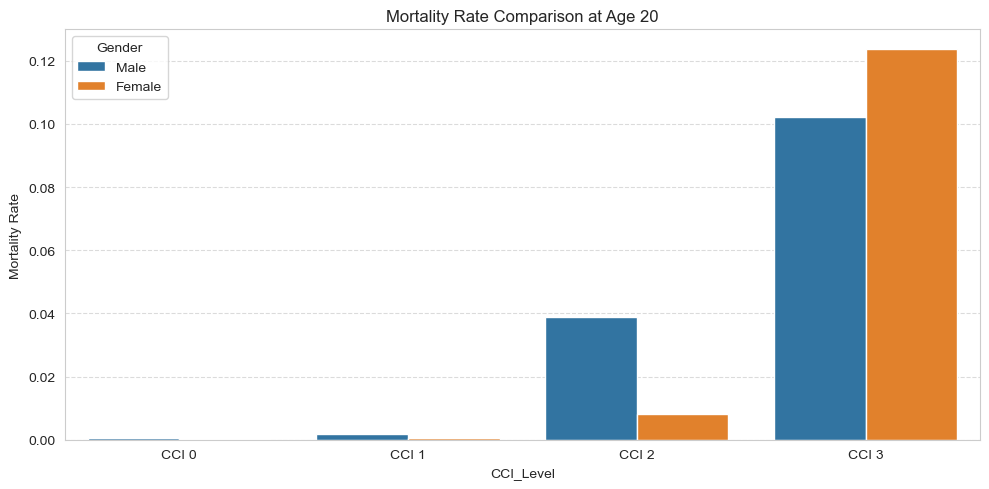

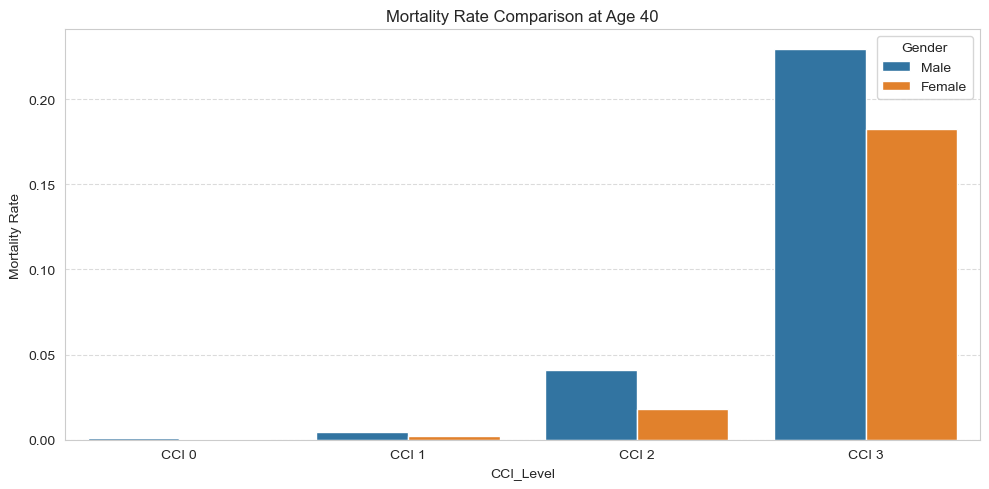

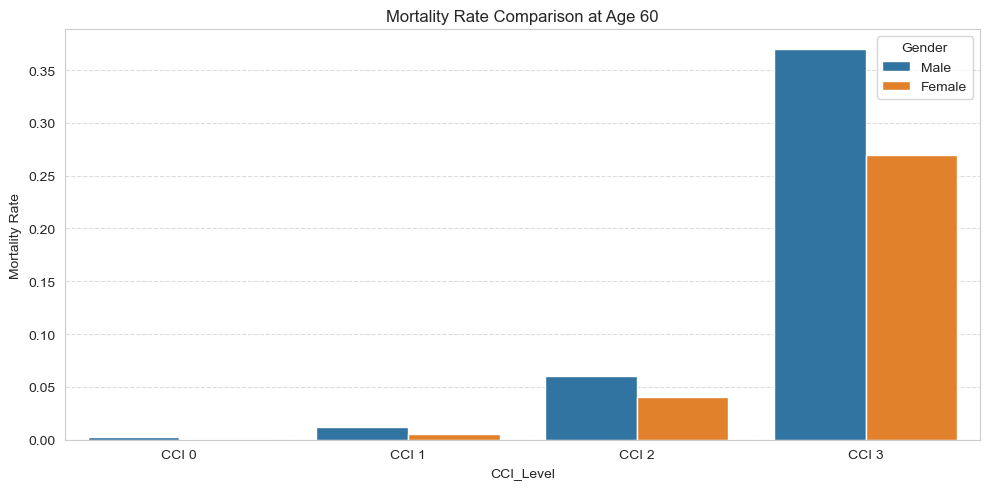

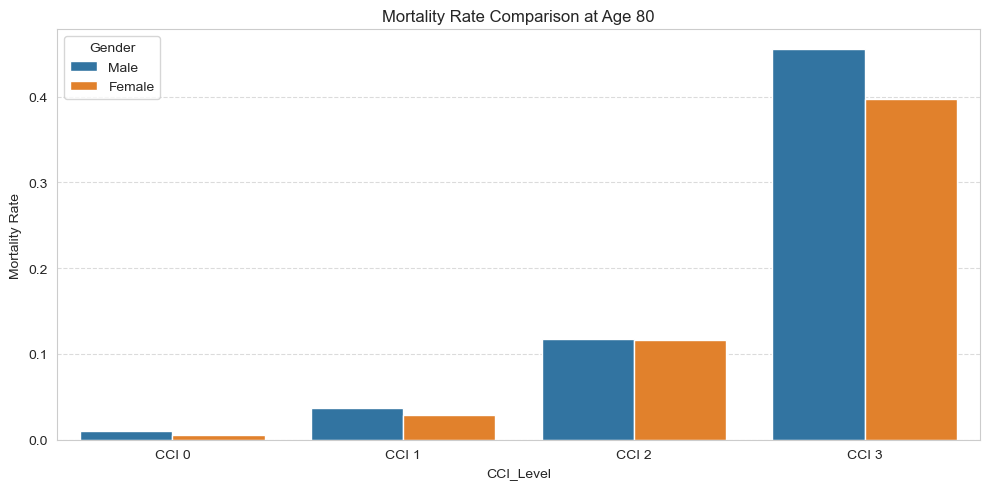

In [69]:
selected_ages = [20, 40, 60, 80]

for age in selected_ages:
    df_age = MORTALITY_RATE[MORTALITY_RATE['Age'] == age]
    
    mortality_long = pd.DataFrame({
        'Gender': df_age['Gender'],
        'CCI 0': df_age['CCI0'],
        'CCI 1': df_age['CCI1'],
        'CCI 2': df_age['CCI2'],
        'CCI 3': df_age['CCI3'],
    })

    mortality_long = mortality_long.melt(id_vars='Gender', var_name='CCI_Level', value_name='Mortality_Rate')

    plt.figure(figsize=(10, 5))
    sns.barplot(data=mortality_long, x='CCI_Level', y='Mortality_Rate', hue='Gender')
    plt.title(f'Mortality Rate Comparison at Age {age}')
    plt.ylabel('Mortality Rate')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

### Visualize Life Expectancy Degradation by CCI Level

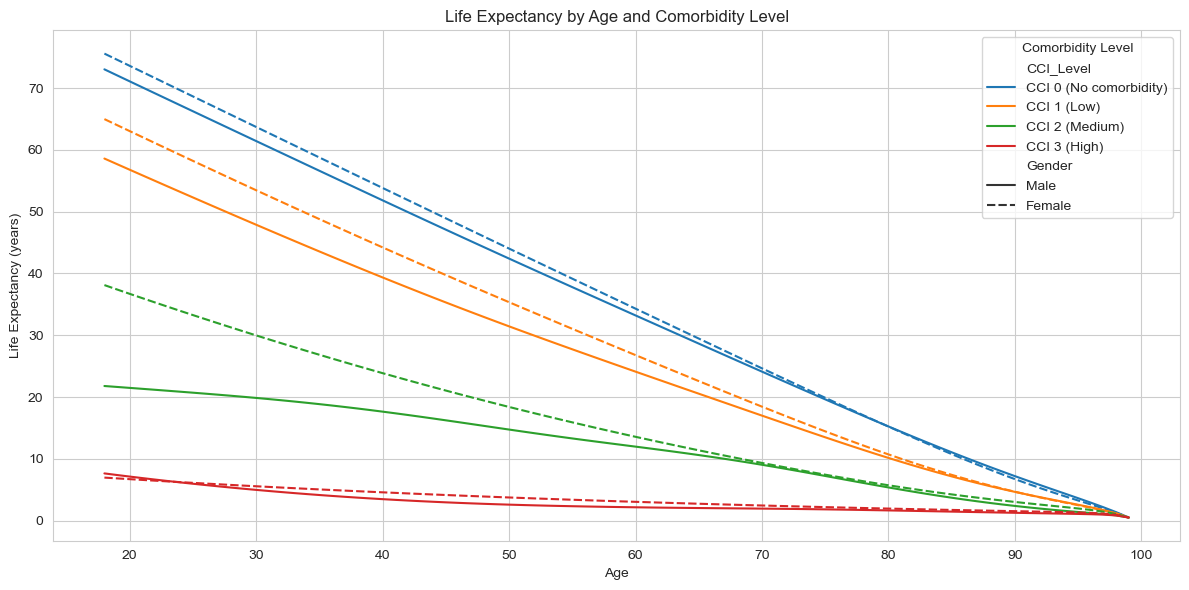

In [55]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=MORTALITY_RATE_LONG, x='Age', y='Life_Expectancy',
             hue='CCI_Level', style='Gender', markers=False)
plt.title('Life Expectancy by Age and Comorbidity Level')
plt.ylabel('Life Expectancy (years)')
plt.xlabel('Age')
plt.legend(title='Comorbidity Level')
plt.grid(True)
plt.tight_layout()
plt.show()

### Survival Profiles for Selected Ages and CCI Levels

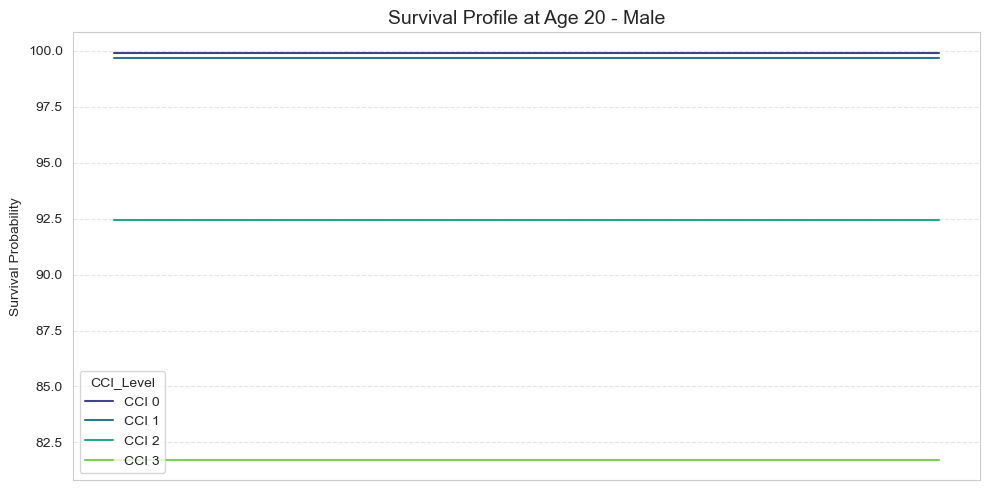

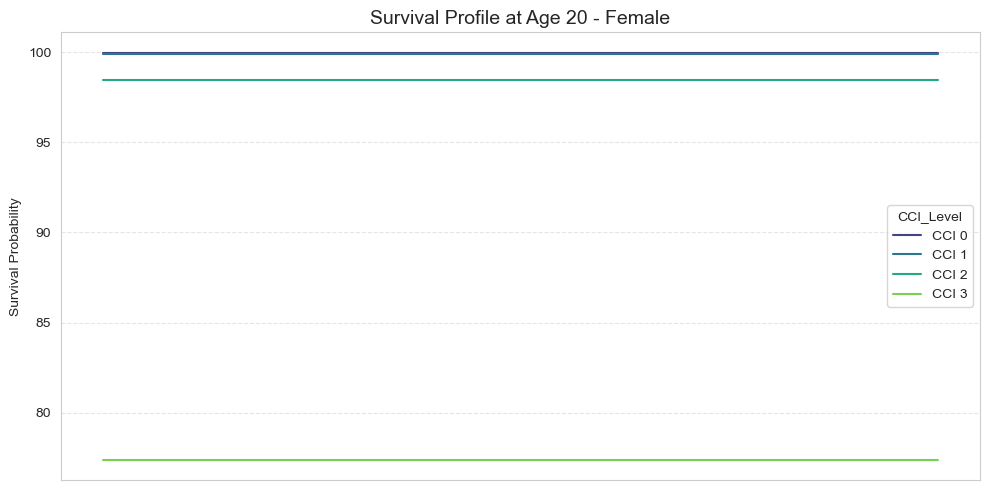

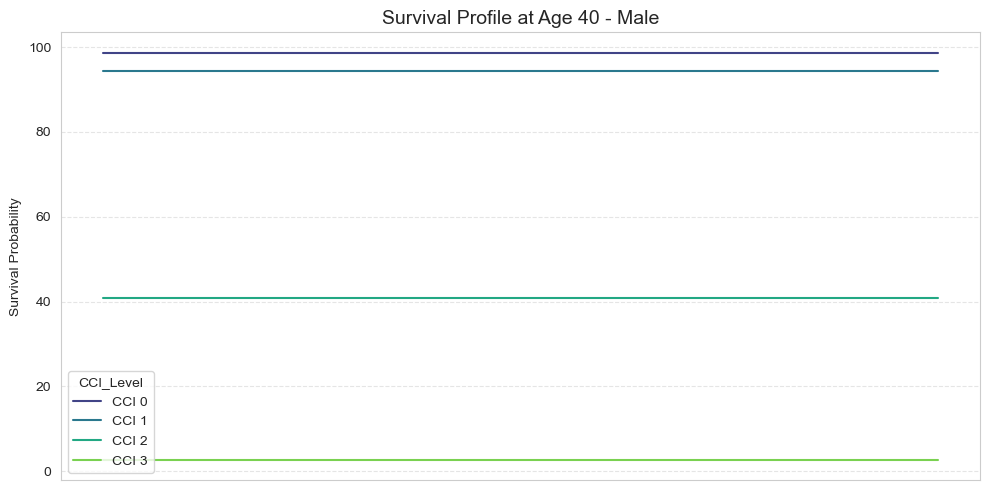

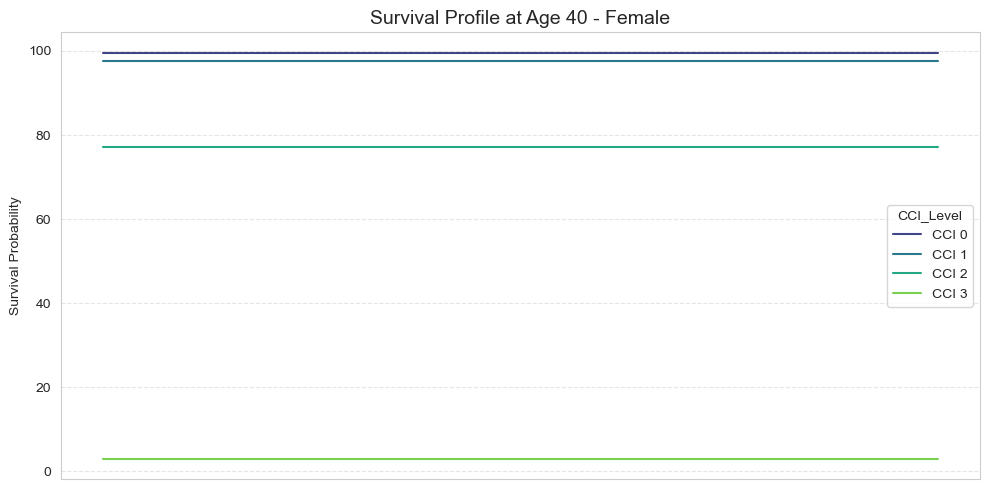

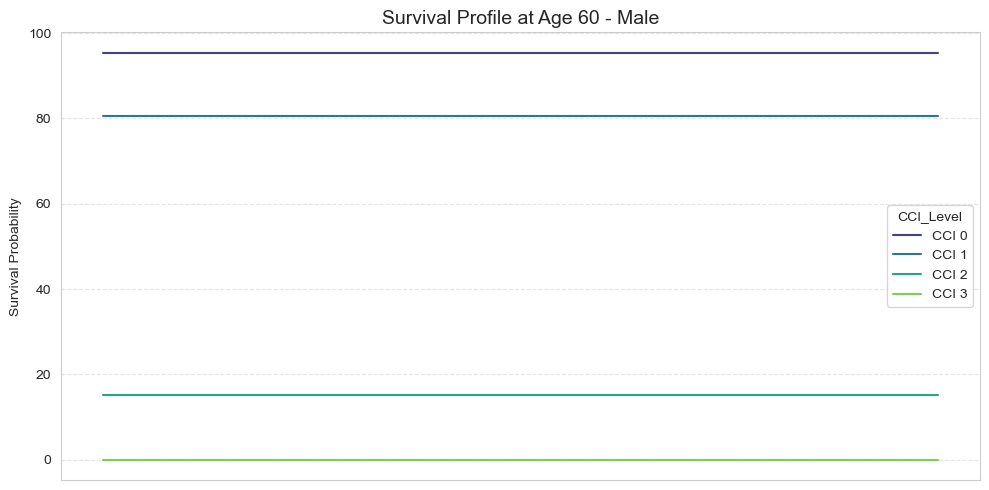

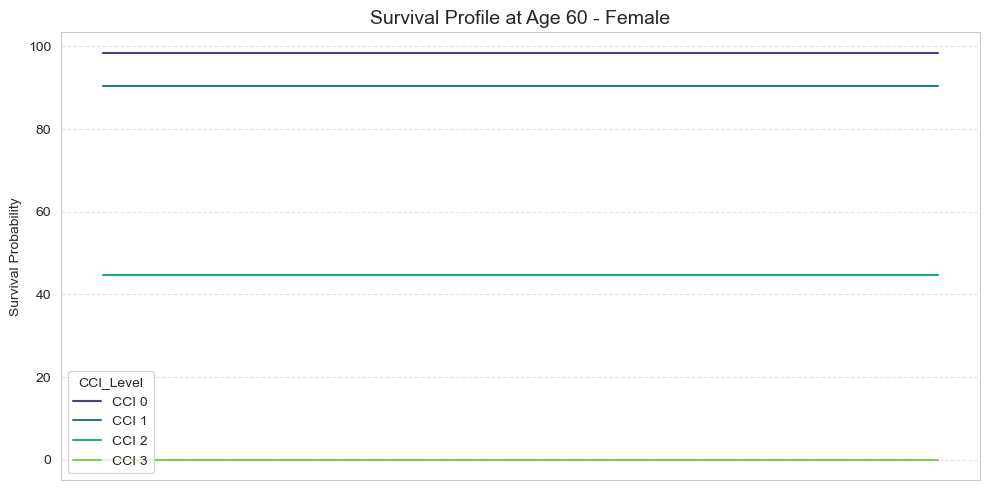

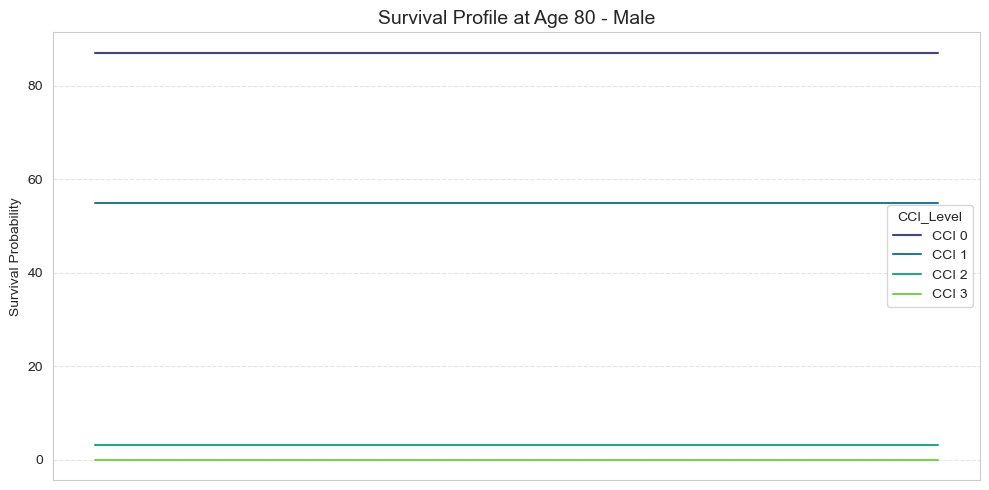

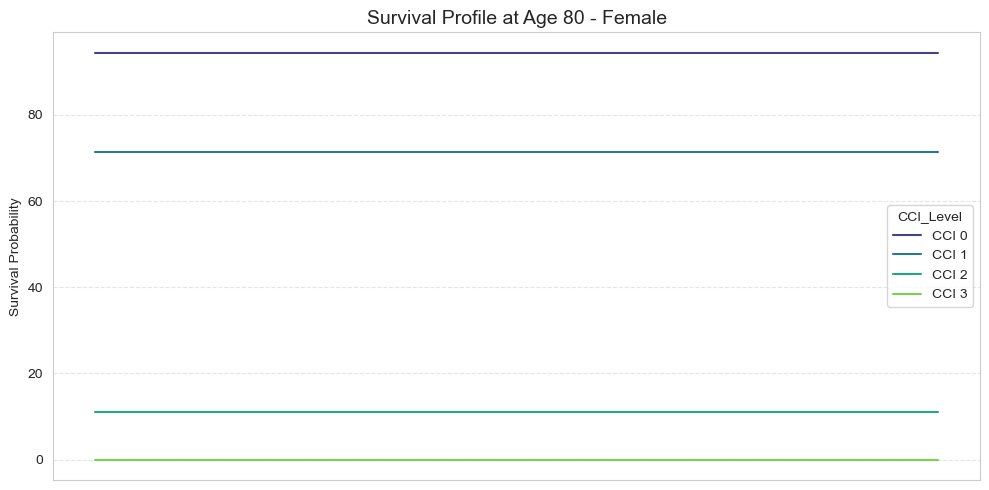

In [75]:
selected_ages = [20, 40, 60, 80]
years_since_index = list(range(30))

for age in selected_ages:
    df_age = MORTALITY_RATE[MORTALITY_RATE['Age'] == age]
    for gender in df_age['Gender'].unique():
        df_age_gender = df_age[df_age['Gender'] == gender]
        survival_data = pd.DataFrame({
            'Year': years_since_index,
            'CCI 0': df_age_gender['SxFict_FCCI0'].values[0] / 1000,
            'CCI 1': df_age_gender['SxFict_FCCI1'].values[0] / 1000,
            'CCI 2': df_age_gender['SxFict_FCCI2'].values[0] / 1000,
            'CCI 3': df_age_gender['SxFict_FCCI3'].values[0] / 1000,
        })

        survival_long = survival_data.melt(id_vars='Year', var_name='CCI_Level', value_name='Survival_Probability')
        
        plt.figure(figsize=(10, 5))
        sns.lineplot(data=survival_long, x='Year', y='Survival_Probability', hue='CCI_Level', palette='viridis')
        plt.title(f'Survival Profile at Age {age} - {gender}', fontsize=14)
        plt.ylabel('Survival Probability')
        plt.xlabel('')  # Remove label
        plt.xticks([])  # Remove ticks
        plt.grid(True, axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

###  Simulate Life Expectancy Gains by Reducing CCI

C:\Users\cedri\AppData\Local\Temp\ipykernel_72672\3982359079.py:22: UserWarning: Glyph 10142 (\N{HEAVY TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\cedri\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10142 (\N{HEAVY TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


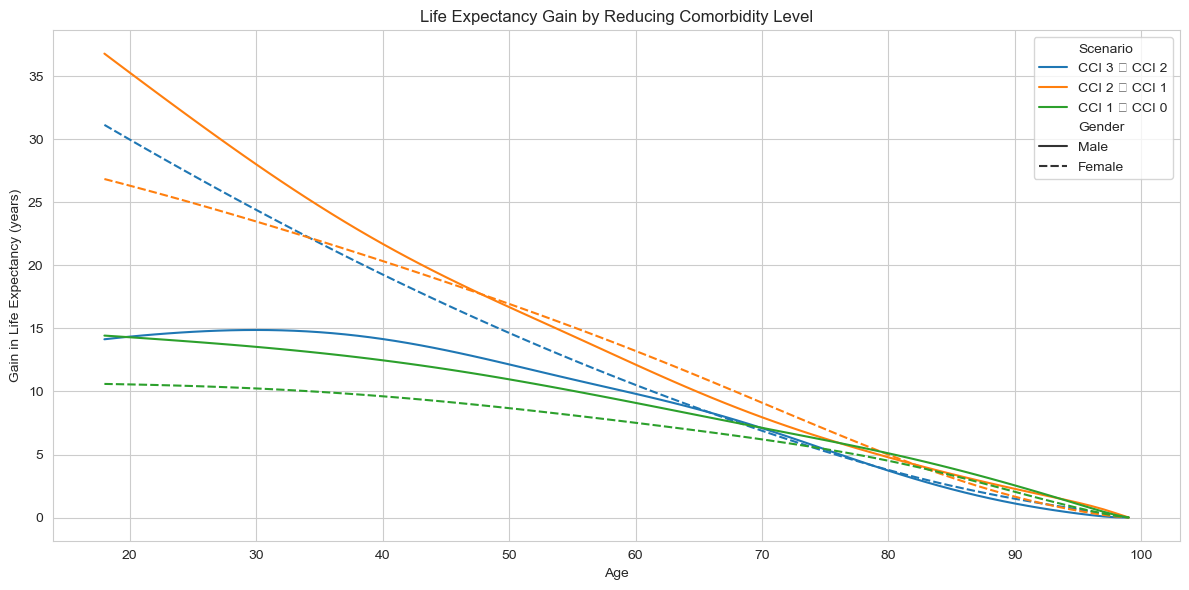

In [66]:
MORTALITY_RATE['Gain_from_CCI3_to_CCI2'] = MORTALITY_RATE['EV_CCI2'] - MORTALITY_RATE['EV_CCI3']
MORTALITY_RATE['Gain_from_CCI2_to_CCI1'] = MORTALITY_RATE['EV_CCI1'] - MORTALITY_RATE['EV_CCI2']
MORTALITY_RATE['Gain_from_CCI1_to_CCI0'] = MORTALITY_RATE['EV_CCI0'] - MORTALITY_RATE['EV_CCI1']

gain_columns = ['Gain_from_CCI3_to_CCI2', 'Gain_from_CCI2_to_CCI1', 'Gain_from_CCI1_to_CCI0']
gain_long = MORTALITY_RATE.melt(id_vars=['Age', 'Gender'], value_vars=gain_columns,
                    var_name='Scenario', value_name='Life_Expectancy_Gain')

gain_long['Scenario'] = gain_long['Scenario'].map({
    'Gain_from_CCI3_to_CCI2': 'CCI 3 ➞ CCI 2',
    'Gain_from_CCI2_to_CCI1': 'CCI 2 ➞ CCI 1',
    'Gain_from_CCI1_to_CCI0': 'CCI 1 ➞ CCI 0'
})

plt.figure(figsize=(12, 6))
sns.lineplot(data=gain_long, x='Age', y='Life_Expectancy_Gain',
             hue='Scenario', style='Gender')
plt.title('Life Expectancy Gain by Reducing Comorbidity Level')
plt.xlabel('Age')
plt.ylabel('Gain in Life Expectancy (years)')
plt.grid(True)
plt.tight_layout()
plt.show()